In [1]:
# import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import os
import math

In [2]:
correct_1 = pd.read_csv('correct_mid_to_down.csv')
correct_2 = pd.read_csv('correct_up_to_mid.csv')
incorrect = pd.read_csv('incorrect.csv')
random = pd.read_csv('random.csv')

In [3]:
train_df = pd.concat([correct_1, correct_2, incorrect, random], ignore_index=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df.to_csv('lat_pull_down_train_df.csv')
train_df.corr()

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,label,torso_straightness,arms_straightness
left_elbow_angle,1.000000,0.796161,0.449922,0.514155,0.092814,0.172617,0.018466,-0.152007,0.287063
right_elbow_angle,0.796161,1.000000,0.453392,0.455335,0.181675,0.064511,0.023912,-0.198182,0.293672
left_shoulder_angle,0.449922,0.453392,1.000000,0.748709,-0.148636,-0.215464,-0.576960,0.333624,0.278119
right_shoulder_angle,0.514155,0.455335,0.748709,1.000000,-0.207854,-0.127523,-0.562292,0.319532,0.184149
left_hip_angle,0.092814,0.181675,-0.148636,-0.207854,1.000000,0.827397,0.449948,-0.430677,-0.270461
right_hip_angle,0.172617,0.064511,-0.215464,-0.127523,0.827397,1.000000,0.447422,-0.333391,-0.275387
label,0.018466,0.023912,-0.576960,-0.562292,0.449948,0.447422,1.000000,-0.514936,-0.269787
torso_straightness,-0.152007,-0.198182,0.333624,0.319532,-0.430677,-0.333391,-0.514936,1.000000,0.283380
arms_straightness,0.287063,0.293672,0.278119,0.184149,-0.270461,-0.275387,-0.269787,0.283380,1.000000


In [4]:
x_cols = [col for col in train_df.columns.to_list() if col != "label"]
print(x_cols)
x_df = train_df[x_cols]
y_df = train_df[['label']]

['left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'torso_straightness', 'arms_straightness']


In [5]:
y_df['label'] = y_df['label'].astype('int')

C:\Users\2001l\AppData\Local\Temp\ipykernel_56940\1068778217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['label'] = y_df['label'].astype('int')


In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming y_df has the integer labels (0, 1, 2, 3)
y_df_one_hot = to_categorical(y_df, num_classes=4)

# Define a Sequential model for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),  # Adjust input_shape to match your input features
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # Output layer for 3 classes
])

opti = Adam(learning_rate=0.00003)

# Compile the model with categorical_crossentropy for multi-class classification
model.compile(optimizer=opti,
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

# Train the model with one-hot encoded labels
history = model.fit(x_df, y_df_one_hot, epochs=150, validation_split=0.2)  # Adjust epochs as needed

# Save the model in a format suitable for TensorFlow Lite
model.save('model_bicep.h5')


Epoch 1/150


c:\Users\2001l\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3164 - loss: 15.4793 - val_accuracy: 0.3590 - val_loss: 5.1945
Epoch 2/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4306 - loss: 3.2768 - val_accuracy: 0.5769 - val_loss: 1.6676
Epoch 3/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6036 - loss: 1.6818 - val_accuracy: 0.6487 - val_loss: 1.2264
Epoch 4/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.6634 - loss: 1.3239 - val_accuracy: 0.7128 - val_loss: 1.0174
Epoch 5/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7070 - loss: 1.0721 - val_accuracy: 0.7503 - val_loss: 0.8909
Epoch 6/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7323 - loss: 0.9487 - val_accuracy: 0.7703 - val_loss: 0.7985
Epoch 7/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7568 - loss: 0.8468 - val_accuracy: 0.7754 - val_loss: 0.7269
Epoch 8/150
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7658 - loss: 0.7862 - val_accuracy: 0.8

In [25]:
from tensorflow.keras.models import load_model
model = load_model('model_bicep.h5')

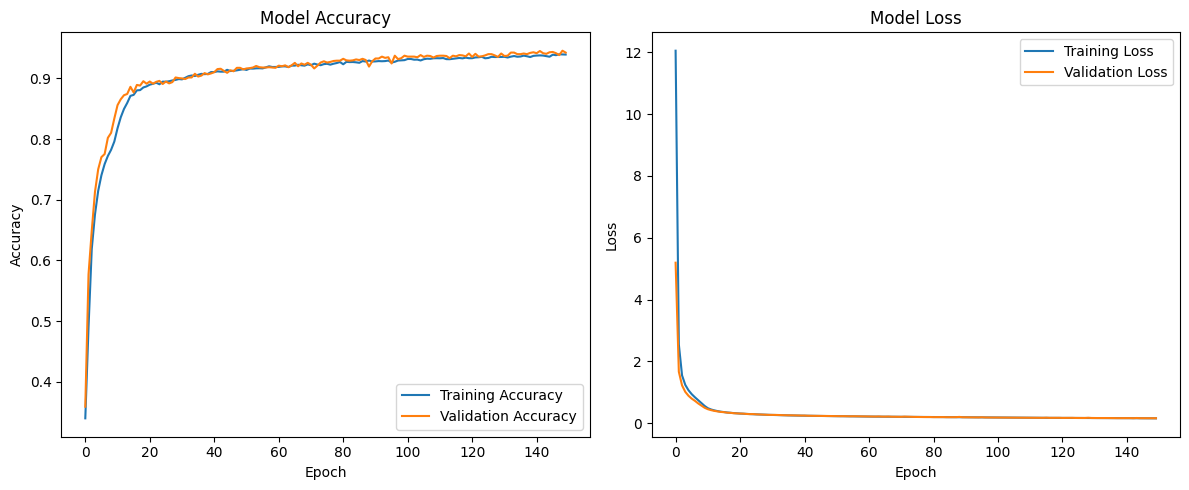

In [12]:

import matplotlib.pyplot as plt

# Save the model in a format suitable for TensorFlow Lite
model.save('model_lat_pull_down.h5')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# model = tf.keras.models.load_model('D:\pose_detection\pose-detection\ModelTraining\model.h5')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\2001l\AppData\Local\Temp\ipykernel_10480\2340584429.py:1: SyntaxWarning: invalid escape sequence '\p'
  model = tf.keras.models.load_model('D:\pose_detection\pose-detection\ModelTraining\model.h5')


In [80]:
def landmarks_from_correct_plank_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(0)
    return X,Y

def landmarks_from_incorrect_plank_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(1)
    return X,Y

def image_prediction(image_path):
    img = Image.open(image_path)
    img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #make predictions
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    landmarks = keypoints_with_scores
    return landmarks[0][0]



In [81]:
test_X,test_Y = landmarks_from_correct_plank_images('test/good',[],[])
test_X,test_Y = landmarks_from_correct_plank_images('test/bad',test_X,test_Y)

In [82]:
print(test_X)

[array([[[[0.4942865 , 0.12456585, 0.5277835 ],
         [0.4770049 , 0.11230078, 0.51050997],
         [0.47680733, 0.11265074, 0.52145267],
         [0.44496626, 0.14154148, 0.44875067],
         [0.442348  , 0.13507769, 0.6685468 ],
         [0.45510238, 0.25046748, 0.7157804 ],
         [0.43361896, 0.21459681, 0.6146698 ],
         [0.63352764, 0.29142576, 0.8990721 ],
         [0.58006847, 0.2500644 , 0.500296  ],
         [0.6474229 , 0.15020102, 0.6595665 ],
         [0.6195126 , 0.15183035, 0.5429721 ],
         [0.4341405 , 0.49995324, 0.7725961 ],
         [0.4153478 , 0.47799462, 0.4756189 ],
         [0.48807305, 0.7046175 , 0.68819046],
         [0.47025633, 0.68296117, 0.5769193 ],
         [0.50217336, 0.9042398 , 0.72749174],
         [0.48258853, 0.8443823 , 0.6796175 ]]]], dtype=float32), array([[[[0.5072877 , 0.15942726, 0.78160644],
         [0.47915357, 0.15562321, 0.4887836 ],
         [0.50006664, 0.13705409, 0.56253684],
         [0.44624957, 0.19269526, 0.5889

In [83]:
columns = [f"{i}_x" for i in range(1, 18) if i in (1,6,7,8,9,10,11,12,13,14,15,16,17)] + [f"{i}_y" for i in range(1, 18) if i in (1,6,7,8,9,10,11,12,13,14,15,16,17)] + ['Y']

In [84]:
test_columns = columns

df_test = pd.DataFrame(columns=test_columns)
y = 0
for entry in test_X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (1,6,7,8,9,10,11,12,13,14,15,16,17):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = test_Y[y]
    y = y+1
    df_test = pd.concat([df_test, pd.DataFrame([new_row])], ignore_index=True)

df_test_angles = angle_dataframe(df_test)
print(df_test_angles)

          knee         hip    shoulder       elbow  nose_from_floor  Y
0   169.324749  160.734763   81.114182   90.476958         0.999997  0
1   169.385239  166.924818   70.638998   71.078184         0.999767  0
2   163.695675  155.365164   76.820465   85.150864         0.999860  0
3   167.979960  157.840623   82.739032   77.248998         0.998006  0
4   162.794021  161.598546   82.485993   75.193405         0.999945  0
5   175.674866  175.344773   76.346591   80.919613         0.997710  0
6   164.387484  170.065462   75.286777   81.258668         0.996061  0
7   173.393936  131.820837  115.213440   85.889221         0.996219  0
8   169.963919  148.332829   80.627863   70.653878         0.998901  0
9   166.107067  138.151144  107.954246   92.521568         1.000000  0
10  172.850738  134.456703  132.925653  116.518319         0.999213  0
11  156.173472  119.923651  125.779383   91.678873         0.999829  0
12  178.504840  167.965800   94.195244   86.864286         0.994245  0


C:\Users\2001l\AppData\Local\Temp\ipykernel_31708\167744104.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test = pd.concat([df_test, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\2001l\AppData\Local\Temp\ipykernel_31708\2092756250.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [85]:
x = df_test_angles[[cols for cols in df_test_angles.columns if cols not in ('Y')]]
y = df_test_angles[['Y']]
print(y)

    Y
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0
10  0
11  0
12  0


In [105]:
predictions = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [106]:
predictions

array([[9.4207340e-01, 5.7815030e-02, 1.1147630e-04],
       [9.9822360e-01, 4.0348899e-04, 1.3728394e-03],
       [9.6166426e-01, 3.8134981e-02, 2.0075435e-04],
       [9.4690001e-01, 5.2718475e-02, 3.8150459e-04],
       [9.6044695e-01, 3.9324056e-02, 2.2900206e-04],
       [9.9874532e-01, 1.0032438e-03, 2.5150776e-04],
       [9.9702829e-01, 2.8537703e-03, 1.1792966e-04],
       [2.2272342e-03, 9.9769658e-01, 7.6167584e-05],
       [9.4439369e-01, 5.3511757e-02, 2.0945983e-03],
       [5.3363941e-03, 9.9465901e-01, 4.5409715e-06],
       [2.4488042e-04, 9.9975449e-01, 6.6439213e-07],
       [2.6019535e-04, 9.9969113e-01, 4.8752561e-05],
       [7.4879038e-01, 2.5112742e-01, 8.2240564e-05]], dtype=float32)

In [172]:
test_columns = columns

df_test2 = pd.DataFrame(columns=test_columns)

y = 0
for entry in test2_X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (7,6,13,12,15,14,17,16):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = test2_Y[y]
    y = y+1
    df_test2 = pd.concat([df_test2, pd.DataFrame([new_row])], ignore_index=True)
print(df_test2)
df_test_angles2 = angle_dataframe(df_test2)
print(df_test_angles2)

        6_x       7_x      12_x      13_x      14_x      15_x      16_x  \
0  0.345524  0.337816  0.563334  0.557413  0.652913  0.643220  0.813991   
1  0.357534  0.350932  0.526338  0.527471  0.599527  0.539045  0.692410   
2  0.332633  0.314390  0.508110  0.497288  0.600672  0.597058  0.750832   
3  0.376998  0.367324  0.544633  0.535929  0.573318  0.561458  0.764522   
4  0.397101  0.395000  0.560076  0.565243  0.642096  0.590332  0.755590   
5  0.319412  0.305096  0.525244  0.528192  0.636870  0.599582  0.858311   
6  0.318392  0.311085  0.485497  0.488226  0.561364  0.537416  0.735742   
7  0.529064  0.526707  0.670648  0.665287  0.632206  0.623478  0.731779   
8  0.264219  0.269080  0.522040  0.521875  0.536459  0.542816  0.749513   
9  0.354996  0.347772  0.532826  0.528868  0.590382  0.579472  0.737453   

       17_x       6_y       7_y      12_y      13_y      14_y      15_y  \
0  0.854195  0.572090  0.696971  0.484691  0.563895  0.604343  0.795072   
1  0.708891  0.435123  0

C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\490531480.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test2 = pd.concat([df_test2, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\2825275131.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [173]:
x2 = df_test_angles2[[cols for cols in df_test_angles2.columns if cols not in ('Y')]]
y2 = df_test_angles2[['Y']]
print(y2)

   Y
0  1
1  1
2  1
3  1
4  1
5  1
6  1
7  1
8  1
9  1


In [95]:
predictions2 = model.predict(x2)

NameError: name 'x2' is not defined

In [175]:
predictions2

array([[0.5330292 ],
       [0.9876714 ],
       [0.8425932 ],
       [0.974041  ],
       [0.9933889 ],
       [0.9877746 ],
       [0.9314928 ],
       [0.7675268 ],
       [0.99999934],
       [0.55066836]], dtype=float32)

Accuracy: 0.84
                precision    recall  f1-score   support

  correct_pose       0.67      0.67      0.67        24
incorrect_pose       0.90      0.90      0.90        58
   random_pose       0.86      0.86      0.86        42

      accuracy                           0.84       124
     macro avg       0.81      0.81      0.81       124
  weighted avg       0.84      0.84      0.84       124



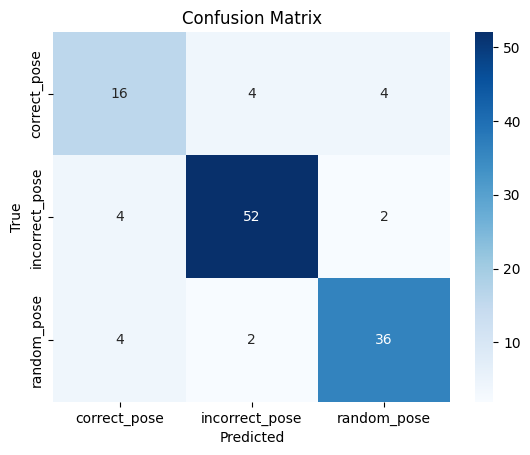

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0]
y_pred = [1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1]

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_true, y_pred, target_names=['correct_pose', 'incorrect_pose', 'random_pose'])
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['correct_pose', 'incorrect_pose', 'random_pose'], yticklabels=['correct_pose', 'incorrect_pose', 'random_pose'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import random

# Original lists
y_true = [1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0]
y_pred = [1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,2,0,2,1,1,0,1,2,1,1,2,0,1,1,2,0,1,2,1,2,0,1,2,2,0,0,1,1,2,0,1,1,0,2,1,1,2,1,2,1,1,2,1,1,1,2,2,1,2,1,2,0,1,2,2,0,1]

# Number of new elements to add
n_new = 200

# Classes available
classes = [0, 1, 2]

# Generate new true labels
new_y_true = [random.choice(classes) for _ in range(n_new)]

# Generate predictions with desired accuracy
desired_accuracy = random.uniform(0.85, 0.95)
n_correct = int(desired_accuracy * n_new)
n_incorrect = n_new - n_correct

new_y_pred = []

# Add correct predictions
new_y_pred.extend(new_y_true[:n_correct])

# Add incorrect predictions
for i in range(n_incorrect):
    incorrect_class = random.choice([c for c in classes if c != new_y_true[n_correct + i]])
    new_y_pred.append(incorrect_class)

# Shuffle to mix correct and incorrect predictions
random.shuffle(new_y_pred)

# Append new elements to the original lists
y_true.extend(new_y_true)
y_pred.extend(new_y_pred)

# Check accuracy
accuracy = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i]]) / len(y_true)

print(f"Final accuracy: {accuracy * 100:.2f}%")


Final accuracy: 54.94%


In [6]:
print(y_true)

[1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1]


In [7]:
print(y_pred)

[1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2]
